In [2]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [3]:
#merging files
joined_files=os.path.join(r'C:/Users/lukman/Documents/Machine learning/Data','housing*.csv')
#a list of all joined files
joined_list=glob.glob(joined_files)
df=pd.concat(map(pd.read_csv, joined_list),ignore_index=True)
df

,Unnamed: 0,Period,Price,Type,Location,Property Ref,Added On,Last Updated,Market Status,Bedrooms,Bathrooms,Toilets,,Parking Spaces,Servicing,Service Charge,Total Area,Covered Area,Furnishing
0,0,per annum,"8,000,000",Terraced Duplex,"Oniru, Victoria Island (VI), Lagos",1243809,02 Mar 2022,11 Apr 2022,Available,5.0,5.0,6.0,,NaN,NaN,NaN,NaN,NaN,NaN
1,1,per annum,"3,500,000",Terraced Duplex,"Ikota Primary Sch, Lekki, Lagos",1310063,05 May 2022,05 May 2022,Available,4.0,5.0,5.0,,3.0,Serviced,"₦40,000 per month",NaN,NaN,NaN
2,2,per annum,"5,000,000",Terraced Duplex,"Asokoro District, Abuja",1309707,05 May 2022,05 May 2022,Available,4.0,5.0,5.0,,NaN,Serviced,"₦500,000",NaN,NaN,NaN
3,3,per square meter / per annum,"40,000",Office Space,"Herbert Macaulay Way, Central Business Distri...",1235981,22 Feb 2022,26 Apr 2022,Available,NaN,2.0,2.0,NaN,1.0,Serviced,"₦11,000 per annum",600 sqm,500 sqm,NaN
4,4,per annum,"5,000,000",Terraced Duplex,"Gated And Secured Area, Jakande, Lekki, Lagos",1310218,05 May 2022,05 May 2022,Available,4.0,4.0,5.0,,3.0,NaN,NaN,300 sqm,200 sqm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20848,919,per annum,"2,800,000",Terraced Duplex,"Megamound Estate Off Lekki County Road, Ikota...",1312432,07 May 2022,07 May 2022,Available,3.0,3.0,4.0,,NaN,NaN,NaN,NaN,NaN,NaN
20849,920,per annum,"5,500,000",Flat / Apartment,"Oniru, Victoria Island (VI), Lagos",1312430,07 May 2022,07 May 2022,Available,3.0,3.0,4.0,,NaN,Serviced,"₦2,500,000 per annum",NaN,NaN,NaN
20850,921,per annum,"1,400,000",Mini Flat (Room and Parlour),Marcus Poli Estate After Azman Filling Statio...,1312425,07 May 2022,07 May 2022,Available,1.0,1.0,1.0,,NaN,NaN,NaN,NaN,NaN,NaN
20851,922,per annum,"4,000,000",Flat / Apartment,"Orchid Lekki Lagos Nigeria, Lekki Expressway,...",1312426,07 May 2022,07 May 2022,Available,4.0,5.0,5.0,,2.0,Serviced,"₦40,000","2,000 sqm","1,000 sqm",NaN


In [ ]:
df=pd.to_excel(r'C:/Users/lukman/Documents/Machine learning/Data/complete_housing_dataset.xlsx')
df

In [90]:
#read excel file
df=pd.read_excel(r'C:/Users/lukman/Documents/Machine learning/complete_housing_dataset.xlsx')
df

,Period,Price,Type,Location,Property_Ref,Added_On,Last_Updated,Market_Status,Bedrooms,Bathrooms,Toilets,Null,Parking_Spaces,Servicing,Service_Charge,Total_Area,Covered_Area,Furnishing
0,per annum,8000000,Terraced Duplex,"Oniru, Victoria Island (VI), Lagos",1243809,02 Mar 2022,11 Apr 2022,Available,5.0,5.0,6.0,,NaN,NaN,NaN,NaN,NaN,NaN
1,per annum,3500000,Terraced Duplex,"Ikota Primary Sch, Lekki, Lagos",1310063,05 May 2022,05 May 2022,Available,4.0,5.0,5.0,,3.0,Serviced,"â‚¦40,000 per month",NaN,NaN,NaN
2,per annum,5000000,Terraced Duplex,"Asokoro District, Abuja",1309707,05 May 2022,05 May 2022,Available,4.0,5.0,5.0,,NaN,Serviced,"â‚¦500,000",NaN,NaN,NaN
3,per square meter / per annum,40000,Office Space,"Herbert Macaulay Way, Central Business Distri...",1235981,22 Feb 2022,26 Apr 2022,Available,NaN,2.0,2.0,NaN,1.0,Serviced,"â‚¦11,000 per annum",600 sqm,500 sqm,NaN
4,per annum,5000000,Terraced Duplex,"Gated And Secured Area, Jakande, Lekki, Lagos",1310218,05 May 2022,05 May 2022,Available,4.0,4.0,5.0,,3.0,NaN,NaN,300 sqm,200 sqm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20848,per annum,2800000,Terraced Duplex,"Megamound Estate Off Lekki County Road, Ikota...",1312432,07 May 2022,07 May 2022,Available,3.0,3.0,4.0,,NaN,NaN,NaN,NaN,NaN,NaN
20849,per annum,5500000,Flat / Apartment,"Oniru, Victoria Island (VI), Lagos",1312430,07 May 2022,07 May 2022,Available,3.0,3.0,4.0,,NaN,Serviced,"â‚¦2,500,000 per annum",NaN,NaN,NaN
20850,per annum,1400000,Mini Flat (Room and Parlour),Marcus Poli Estate After Azman Filling Statio...,1312425,07 May 2022,07 May 2022,Available,1.0,1.0,1.0,,NaN,NaN,NaN,NaN,NaN,NaN
20851,per annum,4000000,Flat / Apartment,"Orchid Lekki Lagos Nigeria, Lekki Expressway,...",1312426,07 May 2022,07 May 2022,Available,4.0,5.0,5.0,,2.0,Serviced,"â‚¦40,000","2,000 sqm","1,000 sqm",NaN


In [91]:
#check the missing values
df.isna().sum()

Period               68
Price                 0
Type                  0
Location              0
Property_Ref          0
Added_On              0
Last_Updated          0
Market_Status         0
Bedrooms           1370
Bathrooms          2028
Toilets            1387
Null               7916
Parking_Spaces     6530
Servicing         12665
Service_Charge    14098
Total_Area        16914
Covered_Area      17057
Furnishing        19075
dtype: int64

In [92]:
#drop unnecessary columns
df=df.drop(columns=['Null','Parking_Spaces','Servicing','Service_Charge','Total_Area','Covered_Area','Furnishing','Property_Ref','Added_On','Last_Updated'])
df

,Period,Price,Type,Location,Market_Status,Bedrooms,Bathrooms,Toilets
0,per annum,8000000,Terraced Duplex,"Oniru, Victoria Island (VI), Lagos",Available,5.0,5.0,6.0
1,per annum,3500000,Terraced Duplex,"Ikota Primary Sch, Lekki, Lagos",Available,4.0,5.0,5.0
2,per annum,5000000,Terraced Duplex,"Asokoro District, Abuja",Available,4.0,5.0,5.0
3,per square meter / per annum,40000,Office Space,"Herbert Macaulay Way, Central Business Distri...",Available,NaN,2.0,2.0
4,per annum,5000000,Terraced Duplex,"Gated And Secured Area, Jakande, Lekki, Lagos",Available,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...
20848,per annum,2800000,Terraced Duplex,"Megamound Estate Off Lekki County Road, Ikota...",Available,3.0,3.0,4.0
20849,per annum,5500000,Flat / Apartment,"Oniru, Victoria Island (VI), Lagos",Available,3.0,3.0,4.0
20850,per annum,1400000,Mini Flat (Room and Parlour),Marcus Poli Estate After Azman Filling Statio...,Available,1.0,1.0,1.0
20851,per annum,4000000,Flat / Apartment,"Orchid Lekki Lagos Nigeria, Lekki Expressway,...",Available,4.0,5.0,5.0


In [93]:
df.isna().sum()

Period             68
Price               0
Type                0
Location            0
Market_Status       0
Bedrooms         1370
Bathrooms        2028
Toilets          1387
dtype: int64

In [94]:
#forward fill missing values
df=df.fillna(method='ffill')
df

,Period,Price,Type,Location,Market_Status,Bedrooms,Bathrooms,Toilets
0,per annum,8000000,Terraced Duplex,"Oniru, Victoria Island (VI), Lagos",Available,5.0,5.0,6.0
1,per annum,3500000,Terraced Duplex,"Ikota Primary Sch, Lekki, Lagos",Available,4.0,5.0,5.0
2,per annum,5000000,Terraced Duplex,"Asokoro District, Abuja",Available,4.0,5.0,5.0
3,per square meter / per annum,40000,Office Space,"Herbert Macaulay Way, Central Business Distri...",Available,4.0,2.0,2.0
4,per annum,5000000,Terraced Duplex,"Gated And Secured Area, Jakande, Lekki, Lagos",Available,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...
20848,per annum,2800000,Terraced Duplex,"Megamound Estate Off Lekki County Road, Ikota...",Available,3.0,3.0,4.0
20849,per annum,5500000,Flat / Apartment,"Oniru, Victoria Island (VI), Lagos",Available,3.0,3.0,4.0
20850,per annum,1400000,Mini Flat (Room and Parlour),Marcus Poli Estate After Azman Filling Statio...,Available,1.0,1.0,1.0
20851,per annum,4000000,Flat / Apartment,"Orchid Lekki Lagos Nigeria, Lekki Expressway,...",Available,4.0,5.0,5.0


In [95]:
#creating Location and State
location=df.Location.str.split(',')
df['Location']=location.str[-2]
df['State']=location.str[-1]
df

,Period,Price,Type,Location,Market_Status,Bedrooms,Bathrooms,Toilets,State
0,per annum,8000000,Terraced Duplex,Victoria Island (VI),Available,5.0,5.0,6.0,Lagos
1,per annum,3500000,Terraced Duplex,Lekki,Available,4.0,5.0,5.0,Lagos
2,per annum,5000000,Terraced Duplex,Asokoro District,Available,4.0,5.0,5.0,Abuja
3,per square meter / per annum,40000,Office Space,Central Business District,Available,4.0,2.0,2.0,Abuja
4,per annum,5000000,Terraced Duplex,Lekki,Available,4.0,4.0,5.0,Lagos
...,...,...,...,...,...,...,...,...,...
20848,per annum,2800000,Terraced Duplex,Lekki,Available,3.0,3.0,4.0,Lagos
20849,per annum,5500000,Flat / Apartment,Victoria Island (VI),Available,3.0,3.0,4.0,Lagos
20850,per annum,1400000,Mini Flat (Room and Parlour),Gwarinpa,Available,1.0,1.0,1.0,Abuja
20851,per annum,4000000,Flat / Apartment,Lekki,Available,4.0,5.0,5.0,Lagos


In [96]:
#Median price for type of property for rent
df1=df.groupby(['Type'])['Price'].median().reset_index().sort_values(by='Price')
df1

,Type,Price
7,Office Space,40000.0
1,Conference / Meeting / Training Room,60000.0
6,Mini Flat (Room and Parlour),500000.0
9,Self Contain (Single Rooms),1400000.0
2,Detached Bungalow,2500000.0
4,Flat / Apartment,3000000.0
5,House,3500000.0
8,Restaurant / Bar,3500000.0
11,Terraced Duplex,3500000.0
3,Detached Duplex,5000000.0


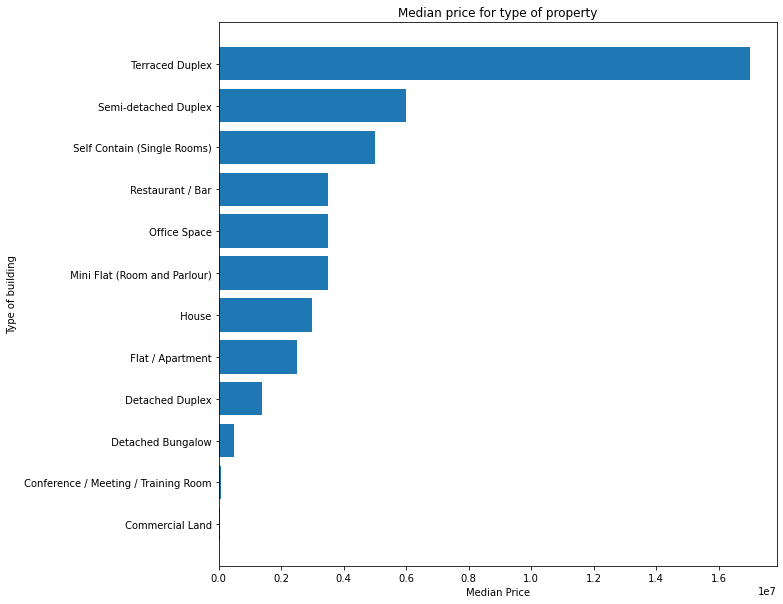

In [97]:
#Horizontal barchart
plt.barh(y=df1['Type'].sort_values(), width=df1.Price)
plt.title('Median price for type of property')
plt.ylabel('Type of building')
plt.xlabel('Median Price')
plt.rcParams['figure.figsize']=(10,10)
plt.show()

In [98]:
#median price for type of property per location
df2=df.groupby(['Location','Type'])['Price'].median().reset_index()
df2

,Location,Type,Price
0,Ajah,Flat / Apartment,1200000.0
1,Ajah,House,3500000.0
2,Ajah,Mini Flat (Room and Parlour),700000.0
3,Ajah,Office Space,650000.0
4,Ajah,Self Contain (Single Rooms),450000.0
...,...,...,...
60,Wuse,Office Space,3000000.0
61,Wuse 2,Flat / Apartment,12000000.0
62,Wuse 2,House,12000000.0
63,Wuye,Flat / Apartment,3500000.0


In [99]:
ct=pd.crosstab([df.Location],df.Type,margins=True)
ct

Type,Commercial Land,Conference / Meeting / Training Room,Detached Bungalow,Detached Duplex,Flat / Apartment,House,Mini Flat (Room and Parlour),Office Space,Restaurant / Bar,Self Contain (Single Rooms),Semi-detached Duplex,Terraced Duplex,All
Location,,,,,,,,,,,,,
Ajah,0,0,0,0,1382,347,340,7,0,104,410,592,3182
Asaba,0,0,0,0,46,0,0,0,0,0,0,0,46
Asokoro District,0,0,0,49,0,0,0,0,0,0,0,502,551
Central Business District,0,0,0,0,0,0,0,328,0,0,0,0,328
Durumi,0,0,0,0,7,0,0,0,0,0,0,0,7
Garki,0,0,131,0,0,0,0,0,0,0,0,0,131
Gbagada,0,0,0,0,7,0,0,0,0,0,0,0,7
Guzape District,0,0,0,0,310,0,0,0,0,0,0,0,310
Gwarinpa,0,0,0,0,310,0,93,0,68,0,0,310,781


In [100]:
df3=df.groupby(['Period'])['Location'].nunique().reset_index()
df3

,Period,Location
0,per annum,30
1,per day,3
2,per square meter / per annum,2


In [101]:
df4=df.groupby(['Period','Location','Type'])['Price'].median().reset_index()
df4

,Period,Location,Type,Price
0,per annum,Ajah,Flat / Apartment,1200000.0
1,per annum,Ajah,House,3500000.0
2,per annum,Ajah,Mini Flat (Room and Parlour),700000.0
3,per annum,Ajah,Office Space,650000.0
4,per annum,Ajah,Self Contain (Single Rooms),450000.0
...,...,...,...,...
61,per day,Gwarinpa,Restaurant / Bar,3500000.0
62,per day,Ikeja,Conference / Meeting / Training Room,50000.0
63,per day,Kado,Conference / Meeting / Training Room,60000.0
64,per square meter / per annum,Central Business District,Office Space,40000.0


In [102]:
ct1=pd.crosstab([df4.Location,df4.Type], df4.Period,margins=True)
ct1.head(60)

Period                                                             per annum  \
Location                   Type                                                
 Ajah                       Flat / Apartment                               1   
                            House                                          1   
                            Mini Flat (Room and Parlour)                   1   
                            Office Space                                   1   
                            Self Contain (Single Rooms)                    1   
                            Semi-detached Duplex                           1   
                            Terraced Duplex                                1   
 Asaba                      Flat / Apartment                               1   
 Asokoro District           Detached Duplex                                1   
                            Terraced Duplex                                1   
 Central Business District  Office Space                                   0   
 Durumi                     Flat / Apartment                               1   
 Garki                      Detached Bungalow                              1   
 Gbagada                    Flat / Apartment                               1   
 Guzape District            Flat / Apartment                               1   
 Gwarinpa                   Flat / Apartment                               1   
                            Mini Flat (Room and Parlour)                   1   
                            Restaurant / Bar                               1   
                            Terraced Duplex                                1   
 Ibadan                     Mini Flat (Room and Parlour)                   1   
 Ibafo                      Flat / Apartment                               1   
 Ibeju Lekki                Flat / Apartment                               1   
                            Mini Flat (Room and Parlour)                   1   
 Ikeja                      Conference / Meeting / Training Room           0   
                            Detached Duplex                                1   
                            Flat / Apartment                               1   
                            House                                          1   
                            Mini Flat (Room and Parlour)                   1   
                            Semi-detached Duplex                           1   
                            Terraced Duplex                                1   
 Ikoyi                      Detached Duplex                                1   
                            Flat / Apartment                               1   
                            Office Space                                   1   
                            Semi-detached Duplex                           1   
                            Terraced Duplex                                1   
 Isolo                      Flat / Apartment                               1   
 Jahi                       Flat / Apartment                               1   
 Kado                       Conference / Meeting / Training Room           0   
 Ketu                       Flat / Apartment                               1   
 Lekki                      Detached Duplex                                1   
                            Flat / Apartment                               1   
                            Mini Flat (Room and Parlour)                   1   
                            Self Contain (Single Rooms)                    1   
                            Semi-detached Duplex                           1   
                            Terraced Duplex                                1   
 Life Camp                  Flat / Apartment                               1   
 Mabushi                    Flat / Apartment                               1   
 Magboro                    Flat / Apartment                               1   


In [103]:
classify_df=df
classify_df

,Period,Price,Type,Location,Market_Status,Bedrooms,Bathrooms,Toilets,State
0,per annum,8000000,Terraced Duplex,Victoria Island (VI),Available,5.0,5.0,6.0,Lagos
1,per annum,3500000,Terraced Duplex,Lekki,Available,4.0,5.0,5.0,Lagos
2,per annum,5000000,Terraced Duplex,Asokoro District,Available,4.0,5.0,5.0,Abuja
3,per square meter / per annum,40000,Office Space,Central Business District,Available,4.0,2.0,2.0,Abuja
4,per annum,5000000,Terraced Duplex,Lekki,Available,4.0,4.0,5.0,Lagos
...,...,...,...,...,...,...,...,...,...
20848,per annum,2800000,Terraced Duplex,Lekki,Available,3.0,3.0,4.0,Lagos
20849,per annum,5500000,Flat / Apartment,Victoria Island (VI),Available,3.0,3.0,4.0,Lagos
20850,per annum,1400000,Mini Flat (Room and Parlour),Gwarinpa,Available,1.0,1.0,1.0,Abuja
20851,per annum,4000000,Flat / Apartment,Lekki,Available,4.0,5.0,5.0,Lagos


In [104]:
classify_df.Toilets.unique()

array([6., 5., 2., 4., 3., 1., 9.])

In [105]:
classify_df['Type']=classify_df.Type.replace([' Terraced Duplex',' Flat / Apartment',' Semi-detached Duplex',' Mini Flat (Room and Parlour)',' Self Contain (Single Rooms)',
' Detached Duplex',' House', ' Detached Bungalow'],'Residential Building')
classify_df['Type']=classify_df.Type.replace([' Office Space',' Conference / Meeting / Training Room',' Commercial Land',' Restaurant / Bar'],'Non-Residential Building')
classify_df['State']=classify_df.State.replace([' Abuja',' Delta',' Oyo',' Osun',' Rivers',' Ogun'],'Not Lagos')
classify_df['Bedrooms']=classify_df.Bedrooms.replace([8.,5.,4.,3.,2],'Multiple Bedrooms')
classify_df['Bedrooms']=classify_df.Bedrooms.replace([1.],'Single Bedroom')
classify_df['Bathrooms']=classify_df.Bathrooms.replace([8.,6.,5.,4.,3.,2],'Multiple Bathrooms')
classify_df['Bathrooms']=classify_df.Bathrooms.replace([1.],'Single Bathroom')
classify_df['Toilets']=classify_df.Toilets.replace([9.,6.,5.,4.,3.,2],'Multiple Toilets')
classify_df['Toilets']=classify_df.Toilets.replace([1.],'Single Toilet')

classify_df

,Period,Price,Type,Location,Market_Status,Bedrooms,Bathrooms,Toilets,State
0,per annum,8000000,Residential Building,Victoria Island (VI),Available,Multiple Bedrooms,Multiple Bathrooms,Multiple Toilets,Lagos
1,per annum,3500000,Residential Building,Lekki,Available,Multiple Bedrooms,Multiple Bathrooms,Multiple Toilets,Lagos
2,per annum,5000000,Residential Building,Asokoro District,Available,Multiple Bedrooms,Multiple Bathrooms,Multiple Toilets,Not Lagos
3,per square meter / per annum,40000,Non-Residential Building,Central Business District,Available,Multiple Bedrooms,Multiple Bathrooms,Multiple Toilets,Not Lagos
4,per annum,5000000,Residential Building,Lekki,Available,Multiple Bedrooms,Multiple Bathrooms,Multiple Toilets,Lagos
...,...,...,...,...,...,...,...,...,...
20848,per annum,2800000,Residential Building,Lekki,Available,Multiple Bedrooms,Multiple Bathrooms,Multiple Toilets,Lagos
20849,per annum,5500000,Residential Building,Victoria Island (VI),Available,Multiple Bedrooms,Multiple Bathrooms,Multiple Toilets,Lagos
20850,per annum,1400000,Residential Building,Gwarinpa,Available,Single Bedroom,Single Bathroom,Single Toilet,Not Lagos
20851,per annum,4000000,Residential Building,Lekki,Available,Multiple Bedrooms,Multiple Bathrooms,Multiple Toilets,Lagos


In [123]:
numerical_features=classify_df.select_dtypes(include=['int64','float64']).columns
y=classify_df['Price']
X=classify_df.drop(columns=['Price','Location','Market_Status','Period'])
categorical_features=classify_df.select_dtypes(include=['object'].drop(columns=['Price','Location','Market_Status','Period'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.24, random_state=2)


SyntaxError: invalid syntax (Temp/ipykernel_9404/1097595968.py, line 5)

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
numeric_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
('scalar', StandardScaler())])
categorical_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor=ColumnTransformer(
transformers=[
('num',numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)

]

)

In [53]:
#Removing outliers that are above the mean
from scipy import stats
z_score=np.abs(stats.zscore)

' Available'